In [46]:
# pandas 可以同时处理文本类型和数字, numpy 主要是处理数学计算
# 嵌入一些 matplotlib 相关api
# Hadoop Spark Storm 如果数据只有几GB，甚至1~2TB，那么pandas也是处理数据的最好选择
# 特殊的数据结构 DataFrame and  Series
# 行索引(主键id) 和 列索引(列名)
import pandas as pd
import numpy as np
b = np.arange(10).reshape((2,5))  # 改变形状
print(b)
a = np.arange(10) # => np.array([1,2,3,4,5,6,7,8,9,10])
print(a)
df = pd.DataFrame(a,columns=["年龄"],index=["赤","橙","黄","绿","青", "赤","橙","黄","绿","青"])
print(df)
df = pd.DataFrame(b,index=["销量","方差"])
print(df)
df = pd.DataFrame(np.array([[1,2,3],[4,5,6]]),
                 index=["第一行","第二行"]
                 ,columns=["第一列","第二列","第三列"]) # 手动创建2行3列
print(df)
stock = np.random.normal(0,1,(500,504))  # 生成期望为0 方差为1的 正态分布随机数
len(stock[0])

print(stock.shape)  # (500,504)
# 时间序列  生成DatetimeIndex对象  freq="D" 周期是Day
# [,,,,] dtype='datetime64[ns]', length=500, freq='D'
date_columns = pd.date_range(start="2018-01-01",periods=stock.shape[1],freq="B")  # periods=50,freq="Y"
print(date_columns)
# help(pd.date_range)
stock_df = pd.DataFrame(stock,index=["第{}行".format(i) for i in range(1,stock.shape[0]+1)],
                       columns=date_columns)  # ["第{}列".format(i) for i in range(1,stock.shape[1]+1)]
stock_df_T = stock_df.T  # 矩阵转换 横向转纵向, 行变列, 列变行
# print(stock_df_T)
# pd.DataFrame()
# 行索引，表明不同行，横向索引，叫index，0轴，axis=0
# 列索引，表名不同列，纵向索引，叫columns，1轴，axis=1

###########  属性  ########
stock_df.dtypes   # numpy 没有爱斯 dtype    2018-01-01    float64  
stock_df.shape    # 形状  (500, 504)
stock_df.index    # Index的对象,行索引的对象
stock_df.index.values  # 获取行索引的值
stock_df.columns  # 获取columns对象.列索引对象
stock_df.columns.values  # 获取列索引的值
# 直接获取data
print(type(stock_df.values))  # 还是numpy的s<class 'numpy.ndarray'>
stock_df.head(10)  # 默认不传是5
stock_df.tail(10)  # 默认不传是5
# stock_df.ndim  # 2维数组, 返回2
""" Series 只有行没有列,通俗的说就是DataFrame的某一列"""

print(type(stock_df["2018-01-01"])) # <class 'pandas.core.series.Series'>
""" 字典的形式创建DataFrame  """
dict_create = pd.DataFrame({1:["mmd","18","man"],2:["bcz","24","woman"]})
# print(stock_df["2018-01-01"])  # 默认取一列
# 手动创建Series 因为可以理解为一个主键一个值,索引可以通过字典的形式来创建Series
ss = pd.Series({1:"mmd",2:"24years old",3:"man"})
# ss.index  # Int64Index([1, 2, 3], dtype='int64')  ss.columns 不存在
# ss[1:3]
# ss["name"]  # 可以通过索引key(行的键针对Series)获取也可以通过下标获取
# pandas 读csv
names=["第{}个".format(i) for i in range(8)]
read_data = pd.read_csv("1.csv",names=names)  # 会默认加入行索引和列索引(没有的前提下)
""" index_col = "date"  表示 行索引date 变为行索引"""
# print(read_data)
# print(read_data.columns)
# print(read_data.index)
# print(read_data.index)
# help(pd.read_csv)
"""
DataFrame.to_csv(path_or_buf=None, sep=', ’, columns=None, 
header=True, index=True, index_label=None, mode='w', encoding=None, rue)
    path_or_buf : string or file handle, default None
    sep : character, default ‘,’
    columns : sequence, optional
    Columns to write，写入文件时指定新的列索引
    header : boolean or list of string, default True,是否写进列索引值
    index : boolean, default True，是否写进行索引值
    index_label : string or sequence, or False, default None，是否将行索引当成
一列数据
"""
"""  hdf文件(.h5)数据里大,支持压缩,跨平台,blosc  读不进去,pip install tables"""
# read_data.to_csv("6666.csv",read_data)  # index=False 写作操作
# pd.read_csv("a.csv",index_col="Unnamed: 1") # 读作操作!!  读取指定某一列为行索引
# h = pd.read_hdf("",key="") 读的时候多了个key可不传  h.to_hdf(key="test_key")  # 必须有key!!!!!

# #key-value存储
# DataFrame.to_hdf(path_or_buf=None)
# #普通方式存储
# h5 = pd.HDFStore('t1.h5','w')
# h5['data'] = a   # "data" 可以自己命名为其他的
# h5.close()
# #压缩方式存储
# h5 = pd.HDFStore('t2.h5','w', complevel=4, complib='blosc')  # -> complevel 压缩界别  complib 压缩方式
# h5['data'] = a
# h5['data2'] = a  # 可以写多个文件到一个文件
# h5.close()
""" 如果要索引数据  必须先写列(索引,看到什么就索引什么)后写行(索引,看到什么就索引什么) """
# print(read_data)
# read_data["产品名称"][10]   # 先列后行 必须一维!!!!!!!!!!!
read_data["第0个"][1]  # 先列后行
read_data[["第0个","第1个","第2个","第3个"][0:3]]  # xxxxxxx错误写法  无此写法 逗号只有loc写法
# read_data[0:5,0:3]                              # xxxxxxxx错误写法 无此写法 纯索引只能[:5][:3]  也是错误写法!!!!
read_data[["第0个","第1个"]]  # [["列名",,]][:3]  or [["列名",,]]["横向索引名"]

"""stock_df.index = pd.to_datetime(stock.index)   一种处理索引错误方法"""
# print(read_data[["第0个","第1个"]])  # 多个就是列表
# read_data["第0个"][1:5]
# read_data[["第0个"][4:]]


# 只能按行或列的名称进行操作
# 先行后列   loc支持逗号写法
# print(read_data.loc[0:3,"第0个":"第3个"])   # 0到3行, 0到3列                第一种写法
# read_data.loc[[0,1,2,3],["第0个","第1个","第2个","第3个"]] # 0到3行, 0到3列  第二种写法
# stock.loc[["2018-03-27","2018-03-27"],"open":"close"]] # 切片!!!!!!!!!!!  前面列表后面区间
# read_data.iloc[0:3,0:3]
# read_data.iloc[0:3,0:3]                # 第一种写法
# read_data.iloc[[0,1,2,3],[0,1,2,3]]    # 第二种写法
# read_data.ix[0:3,"第0个":"第3个"]        # 过时的api 不建议,,,,,,, 组合使用
# read_data.ix[[0,1,2,3],["第0个","第1个","第2个","第3个"]]  # 过时api 第二种写法
# read_data.iloc[0:4,:].loc[:,"第0个":"第3个"]  # 自己的写法 结合使用
# 必须传入基准列名称by=""
# read_data.sort_values(by=["第4个"],ascending=False)  # by=[] or string 
# read_data()
# read_data.sort_index(ascending=False)  # 默认行排序 ,用的相对较少
# read_data.describe()
# read_data.mean()  # 默认展示所有列的平均值
# read_data.mean()  # axis=0 or 1 统计 0 轴 or 1轴  强制取行
# read_data["第4个"][1:].idxmin()  # argmin()
# read_data["第4个"][1:].idxmax()  # argmax()
# """ df[[column]] = df[[column]].astype(type) 转换类型 """
# temp = read_data["第4个"][1:].astype(np.float)
# temp = read_data[["第3个"]]#[1:].astype(np.float)
# temp = read_data[["第3个","第4个"][0:6]]# [1:].astype(np.float)

# temp
# print(type(temp))  # <class 'pandas.core.series.Series'>  字典取法即可
# plt =temp.cumsum().plot()  # 当做正增负数减
# read_data[["多列名"]].cumsum() 累计统计和  read_data["单列"].cumsum()
# .cumprod()  前n个数的乘积 
# .cummax() 前n个数的最大值
# .cummin() 前n个数的最小值
# print(type(plt))  # <class 'matplotlib.axes._subplots.AxesSubplot'>
# stock_df[stock_df["2018-01-01"]>0]
read_data["第3个"]
test_data =  pd.DataFrame(np.array([[1,2,3],[4,5,6]]))
test_data =pd.DataFrame(np.array([[1,2,3],[4,5,6]]),
                 index=["第一行","第二行"]
                 ,columns=["第一列","第二列","第三列"]) # 手动创建2行3列
print(test_data)
test_data[test_data["第一列"]>1]   # 筛选出第一列大于1的一行数据
test_data[(test_data["第一列"]>1) & (test_data["第一列"]<5)] # 筛选出第一列大于1并且小于5的的一行数据
test_data[(test_data["第一列"]>1) | (test_data["第一列"]<5)] # 筛选出第一列大于1or小于5的的一行数据IMDB-Movie-Data.csv

[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4 5 6 7 8 9]
   年龄
赤   0
橙   1
黄   2
绿   3
青   4
赤   5
橙   6
黄   7
绿   8
青   9
    0  1  2  3  4
销量  0  1  2  3  4
方差  5  6  7  8  9
     第一列  第二列  第三列
第一行    1    2    3
第二行    4    5    6
(500, 504)
DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2019-11-22', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-12-02', '2019-12-03',
               '2019-12-04', '2019-12-05'],
              dtype='datetime64[ns]', length=504, freq='B')
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
     第一列  第二列  第三列
第一行    1    2    3
第二行    4    5    6


,第一列,第二列,第三列
第一行,1,2,3
第二行,4,5,6


In [2]:
# 空值  NaN  float 类型  
""" 删除  or  填充 """
print(type(np.nan)) # <class 'float'>
movie = pd.read_csv("IMDB-Movie-Data.csv")
# movie     # 第7行 Revenue NaN 营收,财政收入
# movie.dropna(axis=1)  # 哪一列有空 删除这一行
# movie.dropna(inplace=True)  # 哪一列有空 并且这一列没什么分析的必要
# movie.fillna(0)  # 可以默认填充0
average = movie["Revenue (Millions)"].mean()  # 均值
movie.fillna(average,inplace=False)  # 填充均值对原先无影响
movie.fillna(average,inplace=True)  # 填充均值对原先有影响,真正修改元数据  通用方式 movie = .....
# 不是NaN 的 特殊符号 ,
#  处理这种空值 
#  1.把他变成 NaN
#  movie.replace("?",np.nan)  ----> 替换数据中的空值 不用NaN 表示
#  movie.fillna(0)


pd.isnull(movie)

# 连续型 : 在一定范围内可以无限划分(价格)
# 离散型 : 在一定范围内不能划分 , 一般是类别数据(颜色)
# 数据分析中: 需要对连续性数据做转换
# 将连续性数据转换成离散型数据
# 肥尾现象  data.p_change.hist(bins=80)   # bins组数
# q = pd.qcut(stock["p_change"],bins)    #  每一个数据所在的区间  传组数
# q.value_counts()   # 分组求count
# 要想直接看出哪个数据是在哪个区间内 -->  哑变量矩阵
# K近邻算法
# 哑变量矩阵可以大大减少 机器学习中 对 k近邻算法的影响
# 对应行属于这个区间置为1 ,否则置为0
# 只需要关心是否属于, 用于不同类别的同等级别没有优先级的
# 如何将连续型数据离散化?  设置固定区间, 做哑变量矩阵
"""  pd.get_dummies() """
bins = [-np.inf, -7, -5, -3, 0, 3, 5, 7, np.inf]  # 正负无穷
data = pd.cut(data.p_change,bins)
new_data =pd.get_dummies(data)  # 获取分组后的哑变量矩阵
# axis:0横轴合并，1按照纵轴合并

result = pd.concat([stock,data],axis=1)  # 纵向拼接
result.iloc[:,10:]  # 取后10个
#  --> 如果指定how 以谁为基准 ,否则是inner_join
# pd.merge(left,right,how='left',on=['key1','key2']) 

stock['week'] = pd.to_datetime(data.index).weekday
stock['is_jiji'] = np.where(stock['p_change']>0,1,0)
# 创建交叉表, 以weekday作为行索引 positive的每个值作为列索引 的统计
cs = pd.crosstab(stock["weekday"],stock["positive"])
cs.sum(axis=1)  # 试一下
cs.div(cs.sum(axis=1),axis=1)

NameError: name 'np' is not defined

In [11]:
# 分组 
# {'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]}
import pandas as pd
# 字典配合数组 , 二维数据,列:['行1','行2']
data = pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
print(data)
data.groupby(by="color")['price1'].sum()  # <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x10458c9e8>
data.groupby(by="color")['price1'].max()  # <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x10458c9e8>
data.groupby(by="color")['price1'].count()  # <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x10458c9e8>
data.groupby(by="color")['price1'].mean()
data.groupby(by=["color","object"])['price1'].mean()

   color   object  price1  price2
0  white      pen    5.56    4.75
1    red   pencil    4.20    4.12
2  green   pencil    1.30    1.60
3    red  ashtray    0.56    0.75
4  green      pen    2.75    3.15


color  object 
green  pen        2.75
       pencil     1.30
red    ashtray    0.56
       pencil     4.20
white  pen        5.56
Name: price1, dtype: float64

State/Province
31    551
32    354
44    333
33    315
11    236
91    162
51    104
42     76
35     75
37     75
12     58
21     57
61     42
50     41
43     35
34     26
53     24
13     24
41     21
45     21
46     16
23     16
92     13
36     13
22     13
52      9
14      8
15      8
63      3
62      3
64      2
Name: Brand, dtype: int64

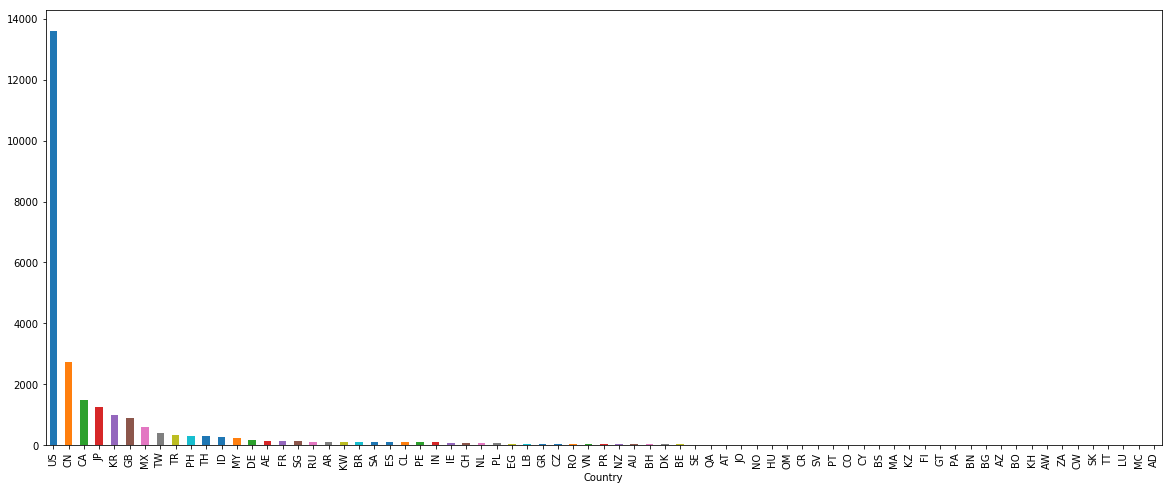

In [28]:
star = pd.read_csv("starbucks_store_worldwide.csv")
star
# print(star)
result = star.groupby(by="Country")["Ownership Type"].count().sort_values(ascending=False)  # 倒叙排序 ["Ownership Type"] 任意列
result.plot(kind="bar",figsize=(20,8))
result = star.groupby(by=["Country","State/Province"])["Brand"].count().sort_values(ascending=False)  # 倒叙排序 ["Ownership Type"] 任意列
result.loc['CN',:]  # 先行后列
